In [1]:
import numpy as np
import os

## a number of regions of interest
```
chr15_hg38_43531685_43769928_0
chr16_hg38_28139916_28830868_0
chr9_hg38_133163441_133361030_0
chr1_hg38_103542345_103798299_0
chr6_hg38_31143427_31484914_0
chr14_hg38_106205008_106874830_0
chr6_hg38_160529904_160666180_0
chr6_hg38_32163513_32992088_0
chr6_hg38_31976719_32117146_0
chrY_hg38_9294496_9591276_0
```

In [2]:
%%bash
cat << EOF  | tr " " "\t" > /results/regions_interest
MHC-C2 hg38_tagged.fa chr6_hg38 32313513 32992088
AMY hg38_tagged.fa chr1_hg38 103542345 103798299 0
SMN1-2 hg38_tagged.fa chr5_hg38 69349669 71553015 
LPA hg38_tagged.fa chr6_hg38 160529904 160666180 0
KATNAL2 hg38_tagged.fa chr18_hg38 46905550 47116795 0
RCCE hg38_tagged.fa chr6_hg38 31976719 32117146 0
IGH hg38_tagged.fa chr14_hg38 106205008 106874830 0
HLA-CB hg38_tagged.fa chr6_hg38 31143427 31484914 0
ABO hg38_tagged.fa chr9_hg38 133163441 133361030 0
TSPY1 hg38_tagged.fa chrY_hg38 9294496 9591276 0
15q15 hg38_tagged.fa chr15_hg38 43531685 43769928 0
16p21 hg38_tagged.fa chr16_hg38 28139916 28830868 0
4q35_dux4 chm13_tagged.fa chr4_chm13 193543291 193563158 0
2q14 hg38_tagged.fa chr2_hg38 120720186 121639223 0
EOF

mkdir -p /wd/results/pgr-out
mkdir -p /wd/results/pgr-out/svg


In [3]:
193531186+13105

193544291

In [4]:
%%bash
cat << EOF  | tr " " "\t" > /results/regions_interest
MHC-C2 hg38_tagged.fa chr6_hg38 32313513 32992088
AMY hg38_tagged.fa chr1_hg38 103542345 103798299 0
SMN1-2 hg38_tagged.fa chr5_hg38 69349669 71553015 
LPA hg38_tagged.fa chr6_hg38 160529904 160666180 1
KATNAL2 hg38_tagged.fa chr18_hg38 46905550 47116795 0
WBS hg38_tagged.fa chr7_hg38 72752602 75600937
EOF

mkdir -p /wd/results/pgr-out
mkdir -p /wd/results/pgr-out/svg

In [5]:
%%bash
\time -v /wd/code/pgr-fetch-seqs /wd/data/pgr-tk-HGRP-y1-evaluation-set-v0 \
-r /results/regions_interest > /wd/results/pgr-out/ROI_seq.fa

	Command being timed: "/wd/code/pgr-fetch-seqs /wd/data/pgr-tk-HGRP-y1-evaluation-set-v0 -r /results/regions_interest"
	User time (seconds): 28.20
	System time (seconds): 338.38
	Percent of CPU this job got: 908%
	Elapsed (wall clock) time (h:mm:ss or m:ss): 0:40.37
	Average shared text size (kbytes): 0
	Average unshared data size (kbytes): 0
	Average stack size (kbytes): 0
	Average total size (kbytes): 0
	Maximum resident set size (kbytes): 37509520
	Average resident set size (kbytes): 0
	Major (requiring I/O) page faults: 0
	Minor (reclaiming a frame) page faults: 10979650
	Voluntary context switches: 1585443
	Involuntary context switches: 696
	Swaps: 0
	File system inputs: 0
	File system outputs: 12376
	Socket messages sent: 0
	Socket messages received: 0
	Signals delivered: 0
	Page size (bytes): 4096
	Exit status: 0


In [6]:
%%bash
\time -v /wd/code/pgr-query /wd/data/pgr-tk-HGRP-y1-evaluation-set-v0 \
/wd/results/pgr-out/ROI_seq.fa /wd/results/pgr-out/pg_seqs --merge-range-tol 100000

	Command being timed: "/wd/code/pgr-query /wd/data/pgr-tk-HGRP-y1-evaluation-set-v0 /wd/results/pgr-out/ROI_seq.fa /wd/results/pgr-out/pg_seqs --merge-range-tol 100000"
	User time (seconds): 70.49
	System time (seconds): 378.95
	Percent of CPU this job got: 504%
	Elapsed (wall clock) time (h:mm:ss or m:ss): 1:29.04
	Average shared text size (kbytes): 0
	Average unshared data size (kbytes): 0
	Average stack size (kbytes): 0
	Average total size (kbytes): 0
	Maximum resident set size (kbytes): 38065524
	Average resident set size (kbytes): 0
	Major (requiring I/O) page faults: 0
	Minor (reclaiming a frame) page faults: 15109834
	Voluntary context switches: 1465465
	Involuntary context switches: 975
	Swaps: 0
	File system inputs: 40
	File system outputs: 1335192
	Socket messages sent: 0
	Socket messages received: 0
	Signals delivered: 0
	Page size (bytes): 4096
	Exit status: 0


In [7]:
target_seqs = {}

with open("/wd/results/pgr-out/pg_seqs.hit") as f:
    for row in f:
        row = row.strip().split("\t")
        if row[0][0] == "#":
            continue
        (q_idx, q_name, query_bgn, query_end, q_len, aln_anchor_count, 
        src, ctg, ctg_bgn, ctg_end, orientation, out_seq_name) = row
        query_bgn = int(query_bgn)
        query_end = int(query_end)
        ctg_bgn = int(ctg_bgn)
        ctg_end = int(ctg_end)
        q_len = int(q_len)
        if query_bgn > 12000 or q_len - query_end > 12000:
            continue
        if abs(ctg_end-ctg_bgn) > q_len * 3:
            continue
        target_seqs.setdefault( (q_idx, q_name), [])
        target_seqs[(q_idx, q_name)].append( (out_seq_name, abs(ctg_end - ctg_bgn)) )

In [8]:
for q_idx, q_name in target_seqs:

    total_len = 0
    c = 0
    include_file = f"/wd/results/pgr-out/{q_name}_included_ctgs.{q_idx}"
    with open(include_file, "w") as f:
        for out_seq_name, l in target_seqs[(q_idx, q_name)]:
            c += 1
            print(out_seq_name, file=f)

    lengths = [_[1] for _ in target_seqs[(q_idx, q_name)]]


    fasta_file = f"/wd/results/pgr-out/pg_seqs.{q_idx}.fa"
    prefix = f"{q_name}_pg_seqs.{q_idx}."

    r = int( 2 * (np.mean(lengths)/50000)**0.5)
    if r < 2:
        r = 2
    if r > 12:
        r = 12
    print(q_idx, q_name, len(lengths), np.mean(lengths), min(lengths), max(lengths), r)
    os.system(f"""/wd/code/pgr-pbundle-decomp -w 48 -k 56 -r {r} \
              --min-span 12 --bundle-length-cutoff 100 --min-branch-size 8 \
              {fasta_file} /wd/results/pgr-out/{prefix} \
              --min-cov 0 --include {include_file}""")
    bed_file = f"/wd/results/pgr-out/{prefix}bed"
    os.system(f"/wd/code/pgr-pbundle-bed2sorted {bed_file} /wd/results/pgr-out/{prefix}")
    ord_file = f"/wd/results/pgr-out/{prefix}ord"
    os.system("cat " + ord_file + " | awk '{print $1\"\\t\"$1}' > " + ord_file + "2")
    track_range = 10000*(int(max(lengths) / 10000) + 1)
    # print(bed_file)
    os.system(f"""/wd/code/pgr-pbundle-bed2svg {bed_file} /wd/results/pgr-out/svg/{prefix} \
              --track-range {track_range} --track-tick-interval 10000 \
              --track-panel-width 1200 \
              --stroke-width 1.2  --annotations /wd/results/pgr-out/{prefix}ord2""")


    os.system(f"/wd/code/pgr-pbundle-bed2dist {bed_file} /wd/results/pgr-out/{prefix}")
    os.system(f"""/wd/code/pgr-pbundle-bed2svg {bed_file} /wd/results/pgr-out/svg/{prefix}hc. \
              --track-range {track_range} --track-tick-interval 10000 \
              --track-panel-width 1200 --stroke-width 0.5 \
              --annotations /wd/results/pgr-out/{prefix}ord2 \
              --ddg-file /wd/results/pgr-out/{prefix}ddg \
              --highlight-repeats 3""")

000 MHC-C2 105 684943.9333333333 580455 808700 7
001 AMY 87 269427.2528735632 159692 514666 4
002 SMN1-2 38 1826190.0789473683 888926 2381980 12
003 LPA 92 207334.64130434784 135747 264605 4
004 KATNAL2 73 215605.0 156458 292902 4
005 WBS 77 2861807.064935065 2499020 4246196 12


In [9]:
 10000*(int(514666/ 10000) + 1)

520000

In [10]:
!head -1 /wd/results/pgr-out/MHC-C2_pg_seqs.000.bed

# cmd: /wd/code/pgr-pbundle-decomp -w 48 -k 56 -r 7 --min-span 12 --bundle-length-cutoff 100 --min-branch-size 8 /wd/results/pgr-out/pg_seqs.000.fa /wd/results/pgr-out/MHC-C2_pg_seqs.000. --min-cov 0 --include /wd/results/pgr-out/MHC-C2_included_ctgs.000


In [11]:
!ls /wd/results/pgr-out/svg/

AMY_pg_seqs.001.2.hc.svg     MHC-C2_pg_seqs.000.hc.2.svg
AMY_pg_seqs.001.hc.3.svg     MHC-C2_pg_seqs.000.hc.3.svg
AMY_pg_seqs.001.hc.svg	     MHC-C2_pg_seqs.000.hc.svg
AMY_pg_seqs.001.svg	     MHC-C2_pg_seqs.000.svg
KATNAL2_pg_seqs.004.hc.svg   SMN1-2_pg_seqs.002.2.hc.svg
KATNAL2_pg_seqs.004.svg      SMN1-2_pg_seqs.002.hc.svg
LPA_pg_seqs.003.1.hc.svg     SMN1-2_pg_seqs.002.svg
LPA_pg_seqs.003.2.hc.svg     WBS_pg_seqs.005.1.hc.svg
LPA_pg_seqs.003.hc.svg	     WBS_pg_seqs.005.2.hc.svg
LPA_pg_seqs.003.svg	     WBS_pg_seqs.005.hc.svg
MHC-C2_pg_seqs.000.hc.1.svg  WBS_pg_seqs.005.svg


In [12]:
from IPython.display import SVG

In [13]:
SVG("/wd/results/pgr-out/svg/MHC-C2_pg_seqs.000.hc.svg")

In [14]:
%%bash
name=AMY
tid="001"
/wd/code/pgr-pbundle-decomp -w 48 -k 56 -r 12 --min-span 12\
     --bundle-length-cutoff 100 --min-branch-size 8 /wd/results/pgr-out/pg_seqs.${tid}.fa \
    /wd/results/pgr-out/${name}_pg_seqs.${tid}.2. \
    --min-cov 2 --include /wd/results/pgr-out/${name}_included_ctgs.${tid}

/wd/code/pgr-pbundle-bed2dist /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.bed \
    /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.

/wd/code/pgr-pbundle-bed2svg  \
    /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.bed \
    /wd/results/pgr-out/svg/${name}_pg_seqs.${tid}.2.hc. \
    --track-range 550000  --track-tick-interval 10000  --track-panel-width 1200 --stroke-width 1.2   \
    --annotations /wd/results/pgr-out/${name}_pg_seqs.${tid}.ord2 \
    --ddg-file /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.ddg



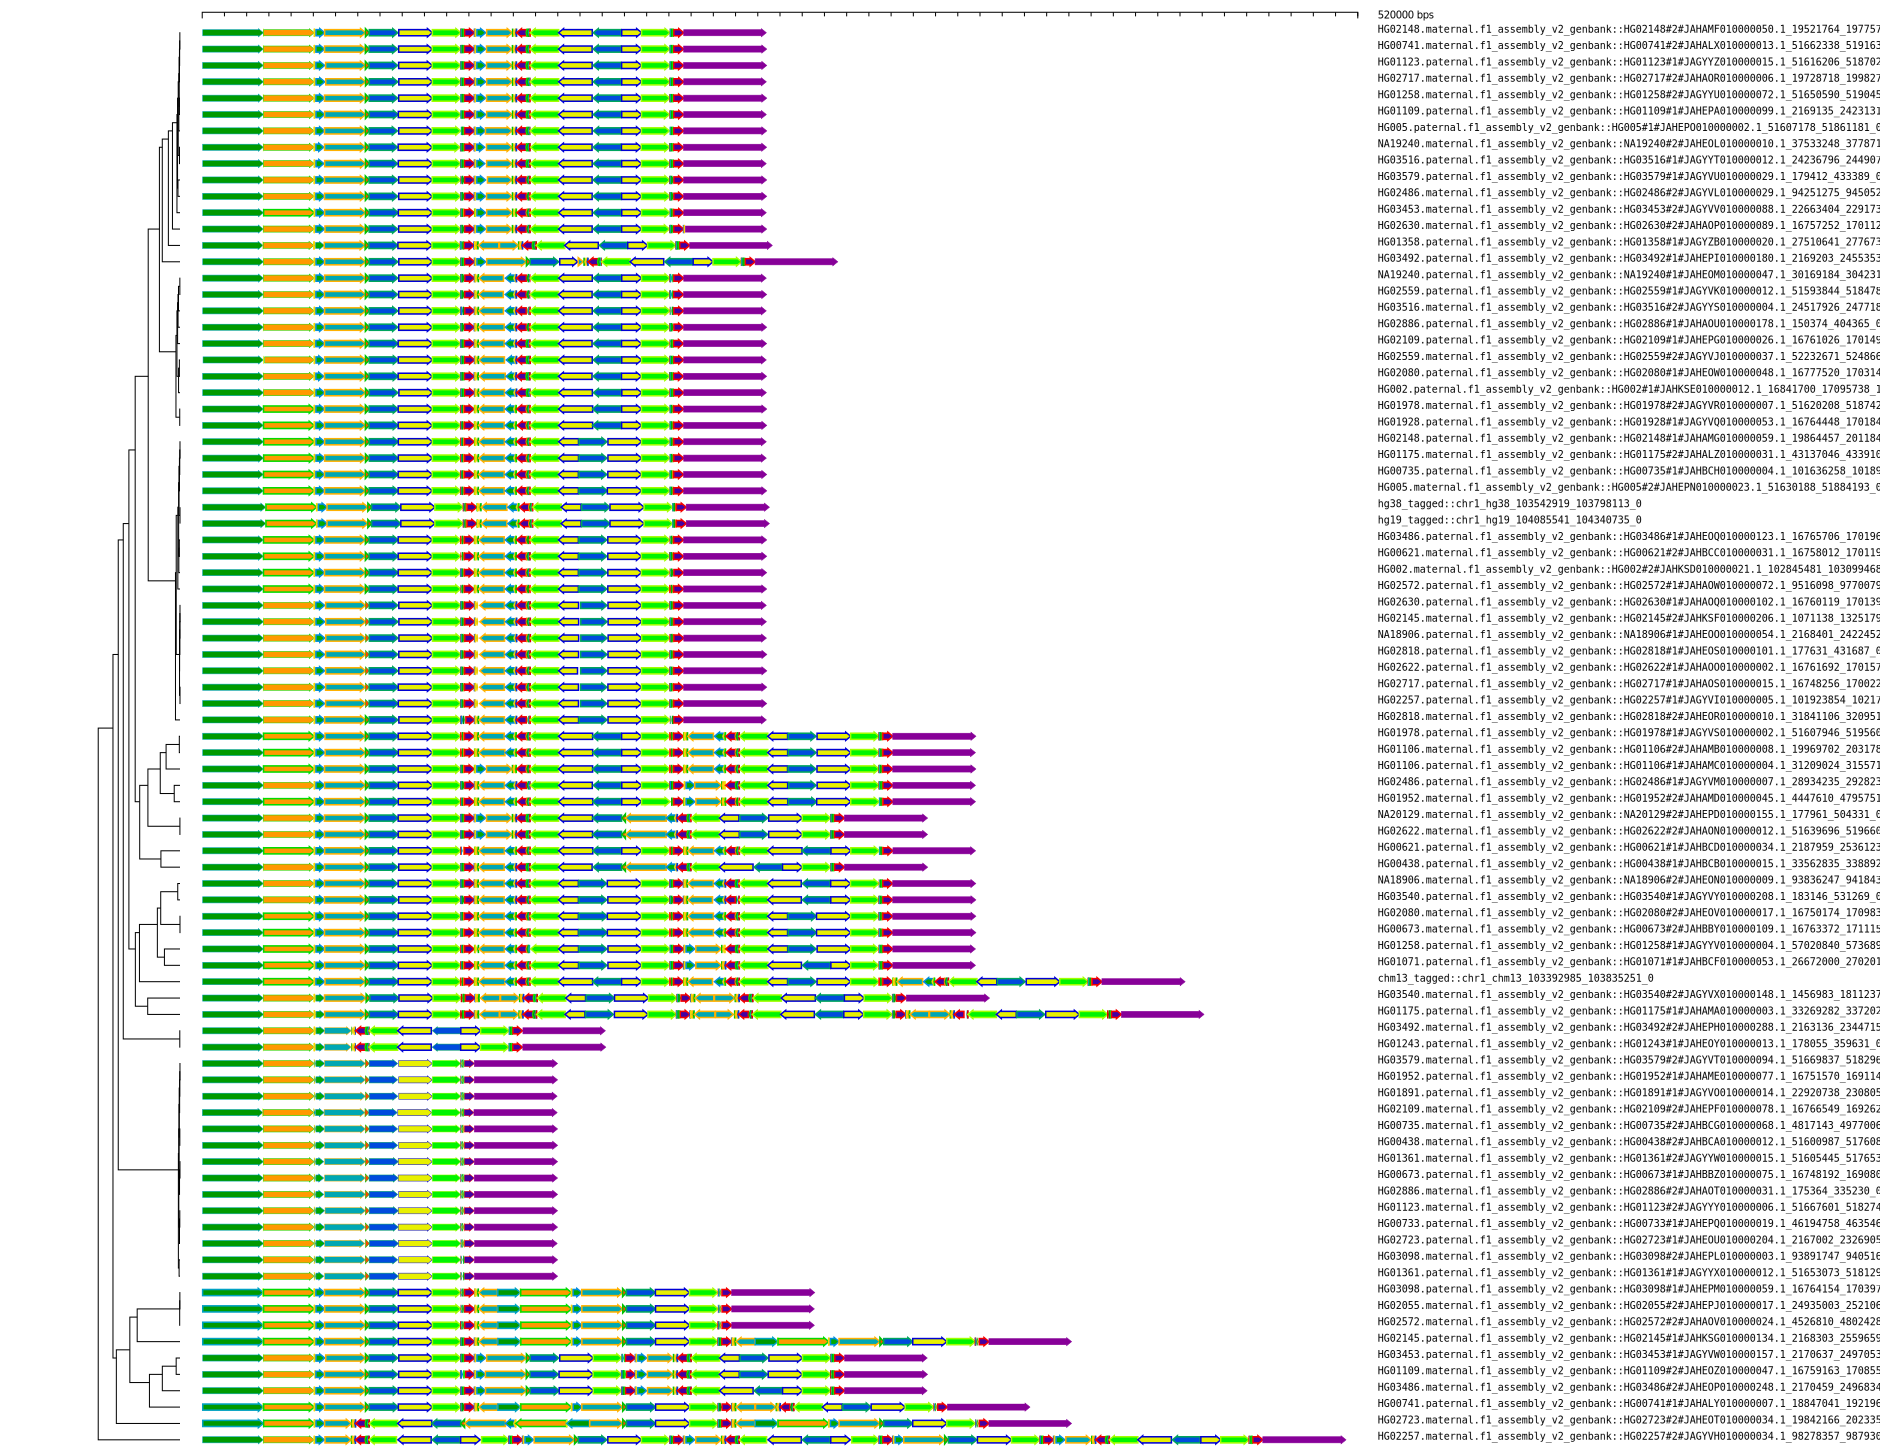

In [15]:
SVG("/wd/results/pgr-out/svg/AMY_pg_seqs.001.hc.svg")

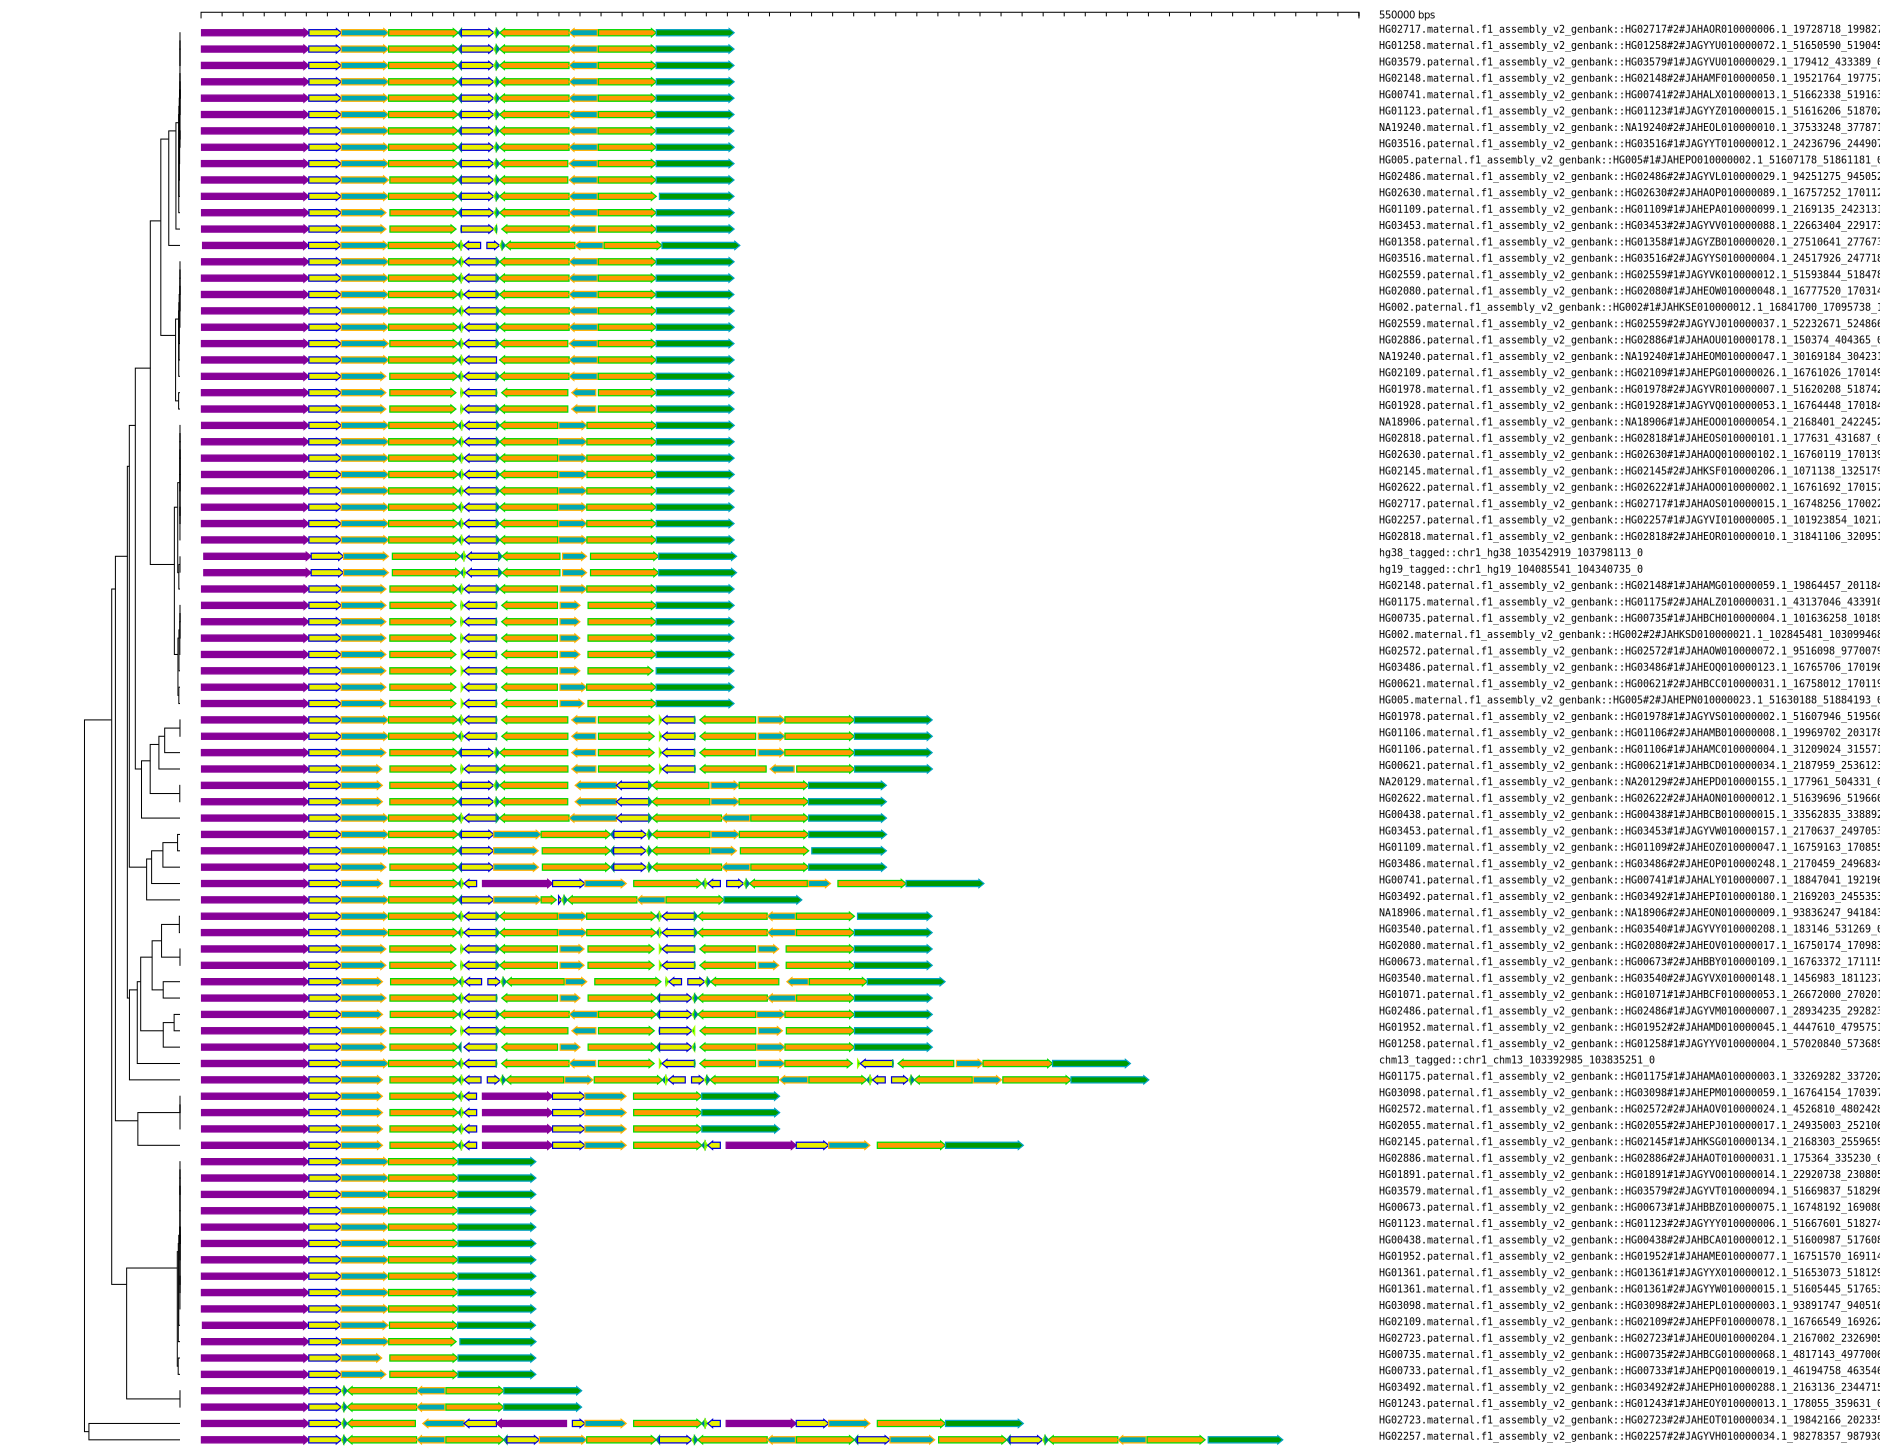

In [16]:
SVG("/wd/results/pgr-out/svg/AMY_pg_seqs.001.2.hc.svg")

In [17]:
%%bash
name="SMN1-2"
tid="002"
/wd/code/pgr-pbundle-decomp -w 128 -k 56 -r 12 --min-span 12\
     --bundle-length-cutoff 100 --min-branch-size 8 /wd/results/pgr-out/pg_seqs.${tid}.fa \
    /wd/results/pgr-out/${name}_pg_seqs.${tid}.2. \
    --min-cov 0 --include /wd/results/pgr-out/${name}_included_ctgs.${tid}

/wd/code/pgr-pbundle-bed2dist /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.bed \
    /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.

/wd/code/pgr-pbundle-bed2svg  \
    /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.bed \
    /wd/results/pgr-out/svg/${name}_pg_seqs.${tid}.2.hc. \
    --track-range 2390000  --track-tick-interval 10000  --track-panel-width 1200 --stroke-width 1.2   \
    --annotations /wd/results/pgr-out/${name}_pg_seqs.${tid}.ord2 \
    --ddg-file /wd/results/pgr-out/${name}_pg_seqs.${tid}.2.ddg


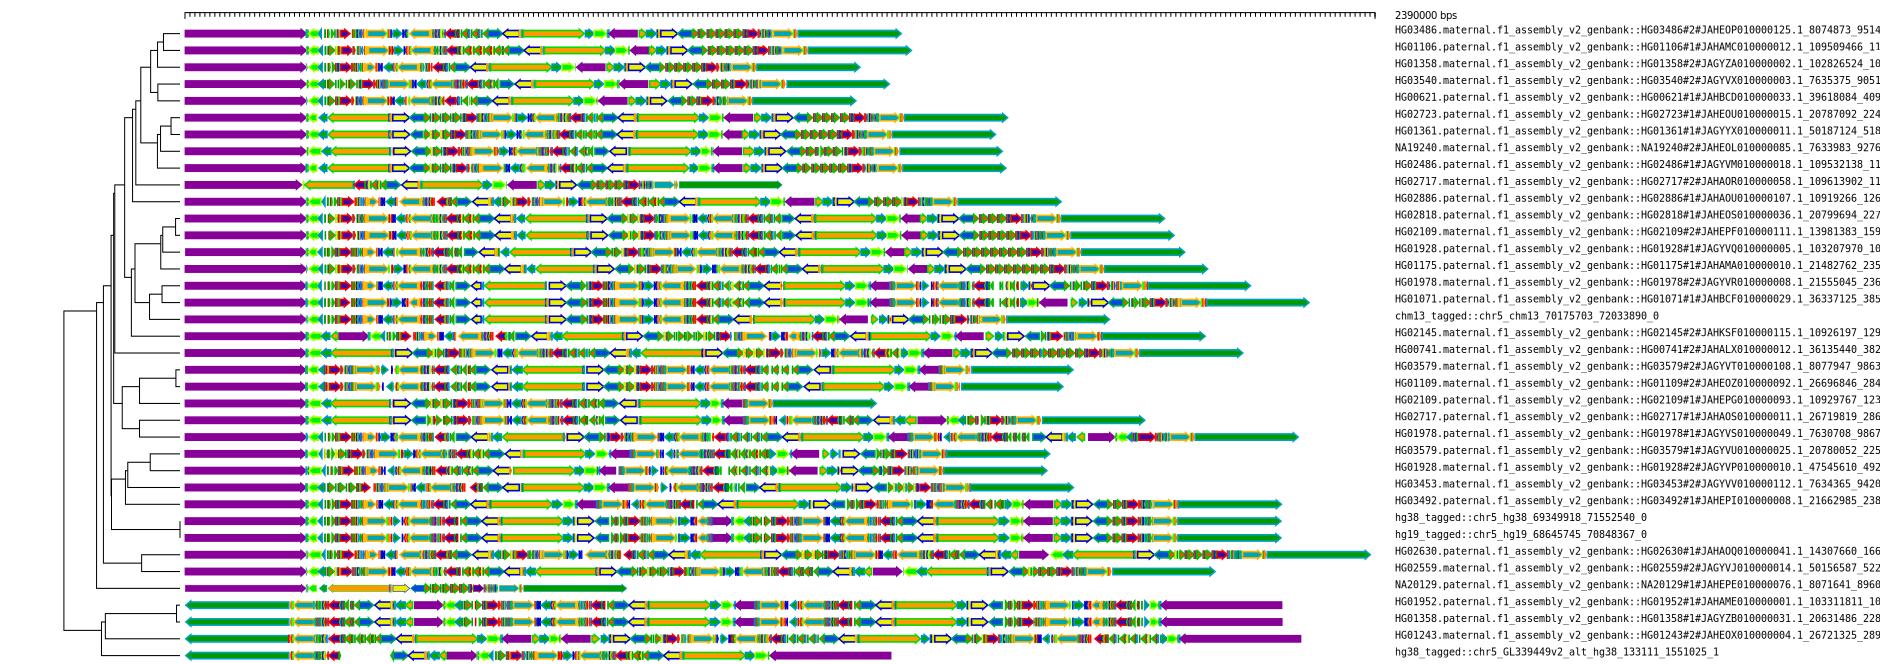

In [18]:
SVG("/wd/results/pgr-out/svg/SMN1-2_pg_seqs.002.hc.svg")

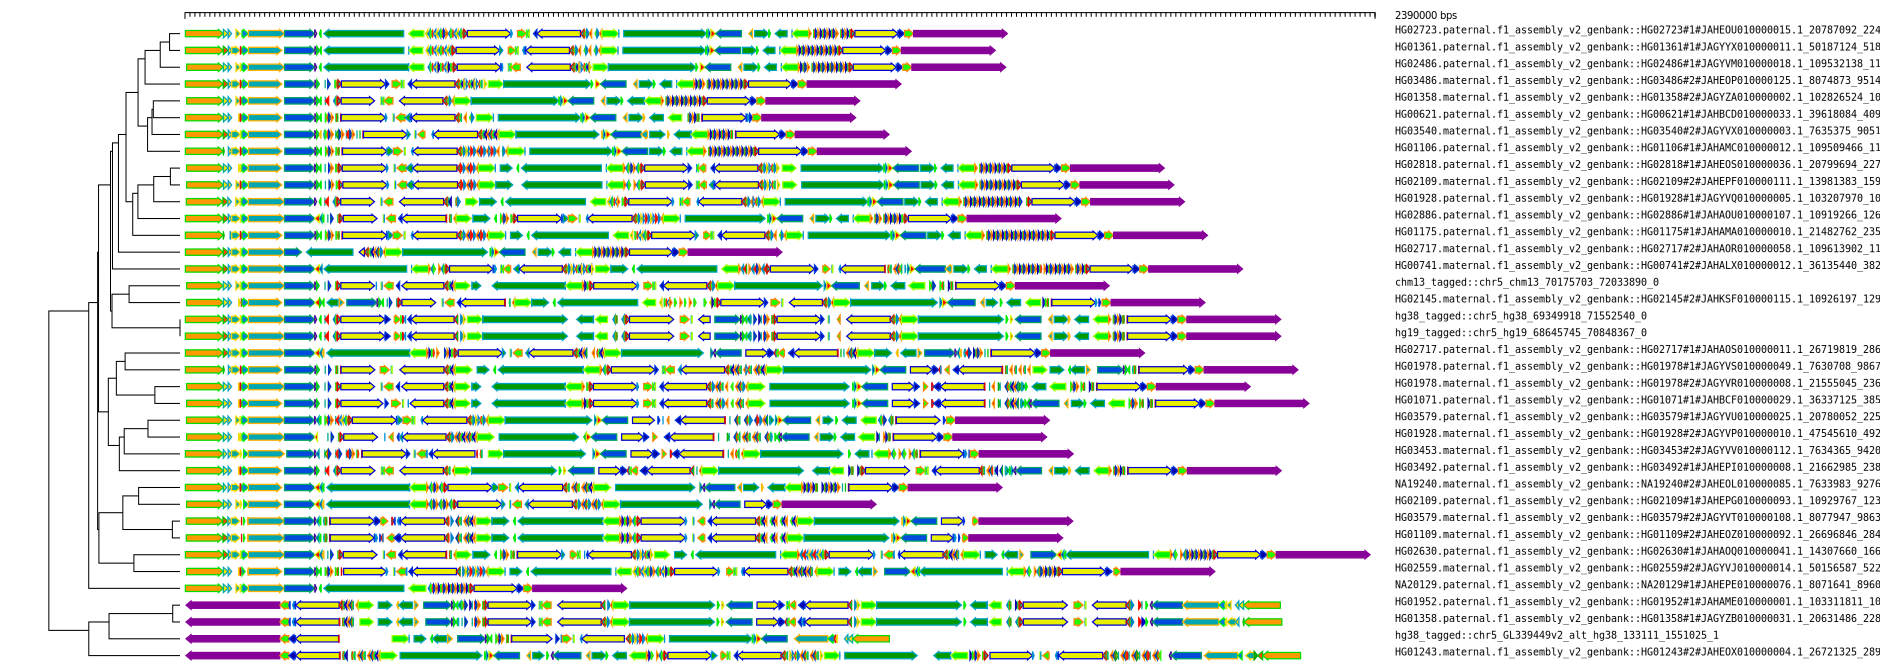

In [19]:
SVG("/wd/results/pgr-out/svg/SMN1-2_pg_seqs.002.2.hc.svg")

In [20]:
!head -1 /wd/results/pgr-out/SMN1-2_pg_seqs.002.bed

# cmd: /wd/code/pgr-pbundle-decomp -w 48 -k 56 -r 12 --min-span 12 --bundle-length-cutoff 100 --min-branch-size 8 /wd/results/pgr-out/pg_seqs.002.fa /wd/results/pgr-out/SMN1-2_pg_seqs.002. --min-cov 0 --include /wd/results/pgr-out/SMN1-2_included_ctgs.002


In [21]:
!head -1 /wd/results/pgr-out/LPA_pg_seqs.003.bed

# cmd: /wd/code/pgr-pbundle-decomp -w 48 -k 56 -r 4 --min-span 12 --bundle-length-cutoff 100 --min-branch-size 8 /wd/results/pgr-out/pg_seqs.003.fa /wd/results/pgr-out/LPA_pg_seqs.003. --min-cov 0 --include /wd/results/pgr-out/LPA_included_ctgs.003


In [22]:
SVG("/wd/results/pgr-out/svg/LPA_pg_seqs.003.hc.svg")